In [1]:
#LOGISTIC REGRESSION WITH HR_COMMA_SEP DATASET
import pandas as pd
import statsmodels.api as sm
x=pd.read_csv("C:/Users/charumathi/Downloads/h1n1_vaccine_prediction.csv")
df=pd.DataFrame(x)
df

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

In [4]:
df.shape

(26707, 34)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [6]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [7]:
for i in df:
    if df[i].dtype==object:
        from sklearn.preprocessing import LabelEncoder
        le=LabelEncoder()
        df[i]=le.fit_transform(df[i])

In [8]:
for i in df:
    if df[i].dtype==object:
        x=df[i].mean()
        df[i].fillna(x,inplace=True)
    else:
        x=df[i].mean()
        df[i].fillna(x,inplace=True)

### VISUALIZATION

(array([ 7271.,     0.,     0.,     0.,     0.,     0.,     0.,   208.,
            0., 19228.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

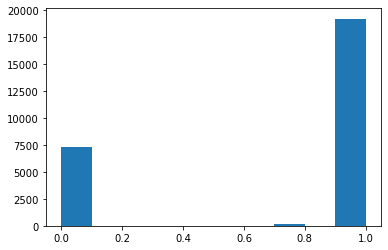

In [9]:
import matplotlib.pyplot as plt
plt.hist(df["contact_avoidance"])

<BarContainer object of 26707 artists>

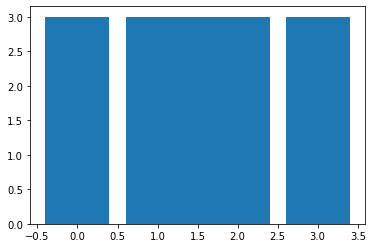

In [10]:
import matplotlib.pyplot as plt
plt.bar(x=df["h1n1_worry"],height=df["race"])

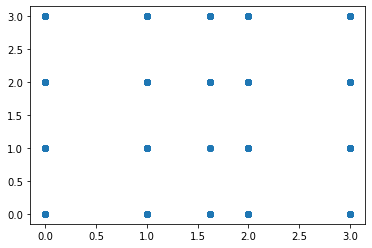

In [11]:
plt.scatter(df["h1n1_worry"],df["income_level"])

<AxesSubplot:xlabel='income_level', ylabel='contact_avoidance'>

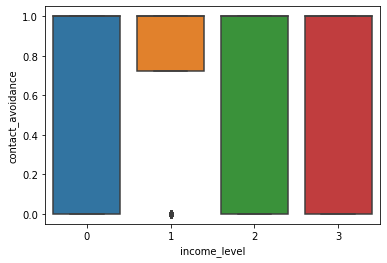

In [12]:
import seaborn as sns
sns.boxplot(x=df["income_level"],y=df["contact_avoidance"])

In [13]:
df.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_ch

In [14]:
X=df.drop(["unique_id","h1n1_vaccine"],axis=1)
y=df.iloc[:,33]

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((18694, 32), (8013, 32), (18694,), (8013,))

In [16]:
from sklearn.linear_model import LogisticRegression
regressor=LogisticRegression()
regressor.fit(X_train,y_train)

LogisticRegression()

In [17]:
y_pred=regressor.predict(X_test)
print(y_pred)

[0 0 1 ... 0 0 0]


In [18]:
regressor.predict_proba(X_test)

array([[0.93459391, 0.06540609],
       [0.9770452 , 0.0229548 ],
       [0.36797922, 0.63202078],
       ...,
       [0.96577999, 0.03422001],
       [0.98987272, 0.01012728],
       [0.93620464, 0.06379536]])

In [19]:
#TO FIND PERFORMANACE
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.8301510046174966

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred,y_test)

array([[5940, 1022],
       [ 339,  712]], dtype=int64)

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.95      0.85      0.90      6962
           1       0.41      0.68      0.51      1051

    accuracy                           0.83      8013
   macro avg       0.68      0.77      0.70      8013
weighted avg       0.88      0.83      0.85      8013



In [22]:
from sklearn.linear_model import SGDClassifier
X = [[0., 0.], [1., 1.]]
y = [0, 1]
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf.fit(X, y)
SGDClassifier(max_iter=5)

SGDClassifier(max_iter=5)

In [23]:
clf.predict([[2., 2.]])
#array([1])
clf.coef_
#array([[9.9..., 9.9...]])
clf.intercept_
#array([-9.9...])
clf.decision_function([[2., 2.]])
#array([29.6...])

array([29.65318117])

In [24]:
clf = SGDClassifier(loss="log_loss", max_iter=5).fit(X, y)
clf.predict_proba([[1., 1.]]) 


array([[4.97248476e-07, 9.99999503e-01]])